In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import os
from shutil import copyfile, move, copy
import sys
import json

In [7]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="trafic_signs.yaml", epochs=10, imgsz=1280, lr0 = 0.01,  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf = 0.01,  # final OneCycleLR learning rate (lr0 * lrf)
momentum = 0.937,  # SGD momentum/Adam beta1
weight_decay = 0.0005,  # optimizer weight decay 5e-4
warmup_epochs = 3.0,  # warmup epochs (fractions ok)
warmup_momentum = 0.8,  # warmup initial momentum
warmup_bias_lr = 0.1,  # warmup initial bias lr
box = 0.05,  # box loss gain
cls = 0.5,  # cls loss gain
hsv_h = 0.015,  # image HSV-Hue augmentation (fraction)
hsv_s = 0.7,  # image HSV-Saturation augmentation (fraction)
hsv_v = 0.4,  # image HSV-Value augmentation (fraction)
degrees = 0.0,  # image rotation (+/- deg)
translate = 0.1,  # image translation (+/- fraction)
scale = 0.5,  # image scale (+/- gain)
shear = 0.0,  # image shear (+/- deg)
perspective = 0.0,  # image perspective (+/- fraction), range 0-0.001
flipud = 0.0,  # image flip up-down (probability)
fliplr = 0.5,  # image flip left-right (probability)
mosaic = 1.0,  # image mosaic (probability)
mixup = 0.0,  # image mixup (probability)
copy_paste = 0.0)  # segment copy-paste (probability))

New https://pypi.org/project/ultralytics/8.0.215 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.122  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=trafic_signs.yaml, epochs=10, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=

       8/10      11.3G   0.006846     0.7582     0.9112         29       1280: 100%|██████████| 3387/3387 [11:37<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:
                   all       5000       8866      0.628      0.628      0.637      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/10      11.3G    0.00679     0.7291     0.9092         27       1280: 100%|██████████| 3387/3387 [11:37<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:
                   all       5000       8866      0.713      0.593      0.664      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/10      11.3G   0.006773     0.7089     0.9082         39       1280: 100%|██████████| 3387/3387 [11:37<00:00,
                 Class     Images  Instances      Box(P         

                   7_5       5000         30      0.708        0.8       0.89       0.71
                 8_4_1       5000          5          1      0.371       0.44      0.319
                  3_14       5000          3          1          0      0.365      0.364
                   1_2       5000         32      0.905      0.896      0.944      0.746
                1_20_2       5000         37      0.641      0.919      0.823      0.611
                 4_1_4       5000        103      0.755      0.932      0.898      0.656
                   7_6       5000          5      0.456      0.513      0.546      0.402
                 8_1_3       5000          4          1          0     0.0521     0.0362
                 8_3_1       5000         16      0.522      0.547      0.524      0.294
                   4_3       5000         16      0.874      0.688      0.846       0.61
                 4_1_5       5000         16       0.33        0.5      0.389      0.298
                 8_2_

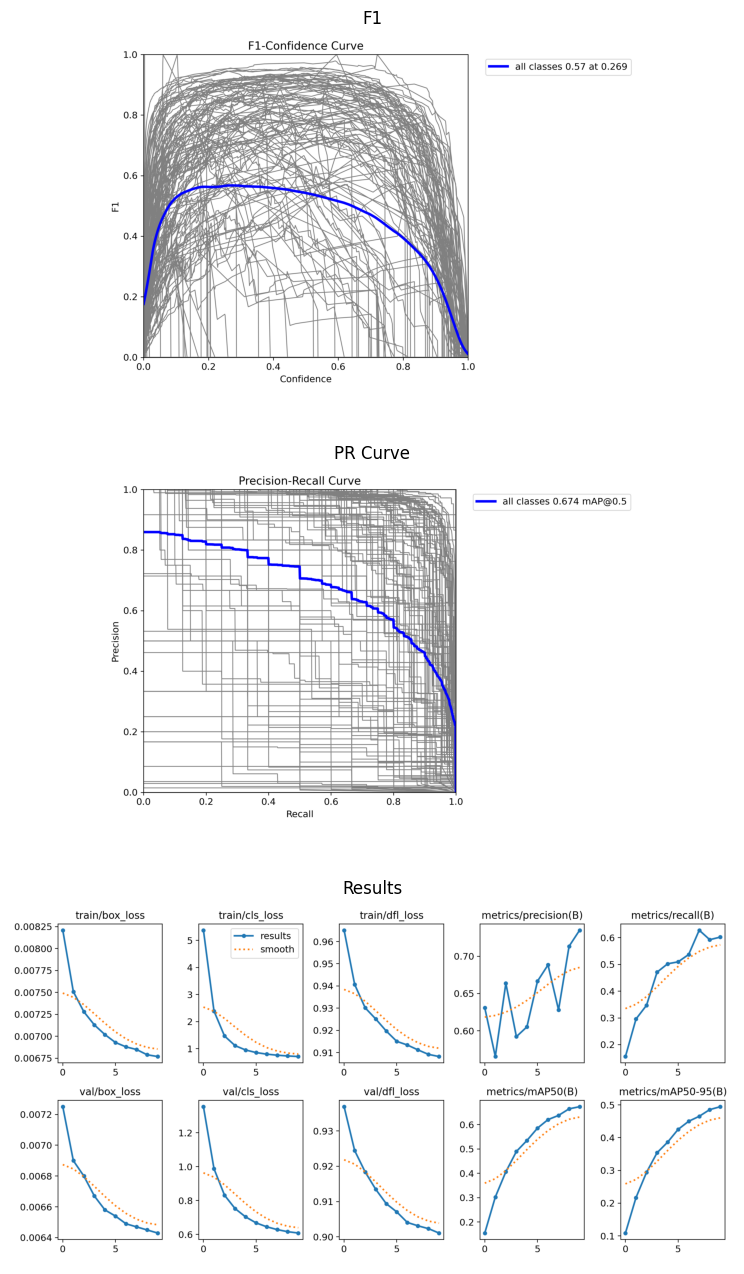

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображений
img1 = mpimg.imread('yolo_results/hyperparams/F1_curve.png')
img2 = mpimg.imread('yolo_results/hyperparams/PR_curve.png')
img3 = mpimg.imread('yolo_results/hyperparams/results.png')

# Создание сетки для отображения изображений
fig, axes = plt.subplots(3, 1, figsize=(12, 16))  # Увеличиваем высоту фигуры

# Отображение изображений подряд
axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title('F1')

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('PR Curve')

axes[2].imshow(img3)
axes[2].axis('off')
axes[2].set_title('Results')

# Показать изображения
plt.show()